# 最小二乘法与宇宙微波背景辐射温度

庞龙刚@华中师范大学

## 学习目标

- 初步认识最小二乘法在拟合数据、物理参数提取中的作用

## 学习内容

1. 宇宙微波背景辐射
2. 使用 python 从文件中读数据、画图
3. 根据黑体辐射公式编写函数，计算给定频率、温度时的光谱
4. 匹配公式与观测数据的单位
5. 使用最小二乘法拟合数据，提取模型参数
6. 最小二乘法系统介绍

## 宇宙大爆炸与宇宙微波背景辐射

1929年 哈勃发现宇宙中星系都在互相远离，宇宙在膨胀；

物理学家伽莫夫猜测，如果时光倒流，宇宙是否会收缩到一个点？我们的宇宙是否起源于一次大爆炸？他提出“宇宙火球模型“，并预言现在宇宙中还存在着火球的余焚（”宇宙微波背景辐射“）。

<img src="images/bigbang.jpg" style="width:600px float:center"></img>

1969年，普林斯顿的几名著名科学家寻找宇宙大爆炸的信号10年未果。

彭齐亚斯和威尔逊为了改进卫星通讯，建立了高灵敏度的号角式接收天线系统，但是受到全天候全方位的电磁干扰。

当他们将消息告诉普林斯顿的科学家迪克，迪克说：宇宙大爆炸的信号找到了！

Planck
<img src="images/宇宙微波背景辐射.jpg" > </img>


宇宙大爆炸模型已经成为大多数科学家对宇宙起源的共识。

大爆炸 $10^{-6}$ 秒时，宇宙是热密的夸克胶子等离子体，实验室条件下通过相对论核碰撞产生。

大爆炸38万年后，原子核与电子结合成原子，电磁波与物质解耦，开始在空间自由传播。

电磁波因为宇宙膨胀不断红移，温度越来越低，到了 137 亿年后的今天，温度只剩下 2.7K，
被称为微波背景辐射。


这一节使用最小二乘法和普朗克黑体辐射公式，拟合宇宙微波背景辐射谱，提取温度 $T$，看能否得到 $T = 2.7K$ 这个数字。

普朗克用黑体辐射公式开启了量子力学的大门，


\begin{align}
\mathrm{I}(\nu, T)=\frac{2 h \nu^{3}}{c^{2}} \frac{1}{e^{\frac{h \nu}{k T}}-1}
\end{align}

$I(\nu, T)$ 描述了温度为 T 的黑体，单位时间，单位面积，单位频率，单位固体角(/sr)辐射出的频率为 $\nu$ 的光的能量。

接下来要做的事情，

1. 读入数据文件，画出宇宙微波背景辐射的能谱与 $\nu$ 的关系曲线
2. 将黑体辐射公式定义成一个函数，并画出 $I(\nu, T)$ 对不同温度的曲线
3. 使用最小二乘法，拟合得到宇宙微波背景温度

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/cosmic_microwave_background.csv")

In [3]:
df.head()

,nu[1/cm],I[MJy/sr],Error[kJy/sr]
0,2.27,200.723,14
1,2.72,249.508,19
2,3.18,293.024,25
3,3.63,327.770,23
4,4.08,354.081,22


注意单位转换：
1. sr 是立体角的单位
2. 1 Jy = $10^{-26} W m^{-2}H_z^{-1}$
3. 1M = $10^6$, 1k = $10^3$
4. 1 eV = 1.602 * $10^{-19}$ J
5. 1 J = 1 Kg $(m/s)^2$ = 1 N m = 1 W s
6. 1 Hz = $(1s)^{-1}$

\begin{align}
1 {\rm MJy/sr} &= 10^6 \times 10^{-26} W m^{-2} s /sr= 10^{-20} J m^{-2} /sr\\
1 J m^{-2} /sr&= 10^{20} {\rm MJy/sr}
\end{align}

In [4]:
nu = df["nu[1/cm]"]
Inu = df["I[MJy/sr]"]
err = df["Error[kJy/sr]"] * 0.001

<ErrorbarContainer object of 3 artists>

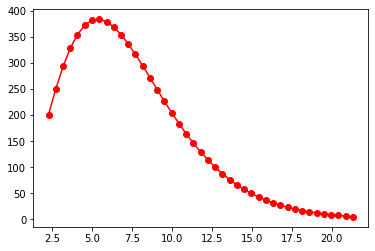

In [5]:
plt.errorbar(nu, Inu, yerr=err, fmt="ro-")

## 定义 Planck 黑体辐射公式

In [6]:
from scipy.constants import Planck
from scipy.constants import Boltzmann
from scipy.constants import speed_of_light as C 

In [7]:
Planck      # unit = J s

6.62607015e-34

In [8]:
Boltzmann  # unit = J / K

1.380649e-23

In [9]:
C          # unit = m/s

299792458.0

**黑体辐射公式**

\begin{align}
\mathrm{I}(\nu, T)=\frac{2 h \nu^{3}}{c^{2}} \frac{1}{e^{\frac{h \nu}{k T}}-1}
\end{align}

In [10]:
def blackbody(nu, T=1.0):
    ''':nu: [1/ cm], frequency
     :T: [K] temperature 
     :return: I(nu, T) unit=[Mjy/Sr]'''
    nu = nu * C * 100   # to HZ (/s)
    coef = 2 * Planck * nu**3 / C**2
    tmp = (Planck * nu) / (Boltzmann * T)
    # I_Jm2 : unit [J/m^2/sr]
    
    I_Jm2 = coef / (np.exp(tmp) - 1)
    to_Mjy_per_Sr = 10**20
    
    return I_Jm2 * to_Mjy_per_Sr

Text(0, 0.5, '$I(\\nu, T)$ [MJy/Sr]')

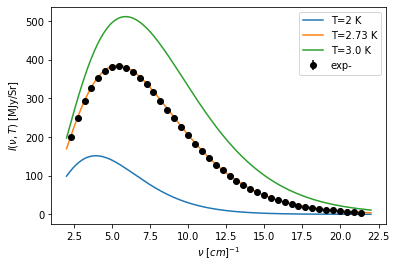

In [11]:
nu_ = np.linspace(2, 22, 200)

plt.errorbar(nu, Inu, yerr=err, fmt="ko", label="exp-")
plt.plot(nu_, blackbody(nu_, T=2.0), label="T=2 K")
plt.plot(nu_, blackbody(nu_, T=2.73), label="T=2.73 K")
plt.plot(nu_, blackbody(nu_, T=3.0), label="T=3.0 K")

plt.legend(loc='best')
plt.xlabel(r"$\nu\ [cm]^{-1}$")
plt.ylabel(r"$I(\nu, T)$ [MJy/Sr]")

## 使用最小二乘法，拟合出宇宙微波背景辐射温度

如上图所示，假设知道了宇宙微波背景辐射的温度为 2.73 K, 使用黑体辐射公式，我们能够描述观测数据 $I(\nu, T=2.73\ K)$ 随频率 $\nu$ 的变化。

反过来，当我们拿到观测数据，而不知道宇宙微波背景辐射温度 T 时，如何通过拟合黑体辐射公式与实验数据，提取出 T？

将黑体辐射公式进行变换，得到，


\begin{align}
\mathrm{I}(\nu, T)=\frac{2 h \nu^{3}}{c^{2}} \frac{1}{e^{\frac{h \nu}{k T}}-1} \color{red}{\Rightarrow}
\ln\left( 1 +{ 2 h \nu^3 \over I c^2} \right)=\frac{h \nu}{k T}
\end{align}


定义 
\begin{align}
y_i &= \ln\left( 1 +{ 2 h \nu_i^3 \over I_i c^2} \right)， \quad\; a =\frac{h }{k T}， \quad\; x_i = \nu_i 
\end{align}

替换后式子变为 $y_i = a x_i$.

则问题转化为寻找参数 $a = {h \over kT}$, 使得如下损失函数最小，

\begin{align}
l(a) = \sum_i （y_i - a x_i）^2
\end{align}

根据 $l(a)$ 最小的条件为 $l$ 对 $a$ 的一阶导为 0,

\begin{align}
{1 \over 2}{\partial l \over \partial a} = \sum_i (y_i - a x_i) (-x_i) = 0  \color{red}{\Rightarrow} a = {\sum_i x_i y_i \over \sum_i x_i^2}
\end{align}

然后求出宇宙微波背景辐射温度，$T = {h \over k a}$。



In [12]:
def ylog(nu, Inu):
    nu = nu * C * 100   # to unit HZ=(s^-1)
    coef = 2 * Planck * nu**3 / C**2
    # I_Jm2 : unit [J/m^2/sr]
    to_Mjy_per_Sr = 10**20
    temp = 1 + coef * to_Mjy_per_Sr / Inu

    return np.log(temp.astype(float))
    
    
def a2T(a):
    '''convert a to T by: T=h/(k a)
    Look out the unit transformation'''
    return Planck * C * 100 / (Boltzmann * a)

公式回顾：
\begin{align}
a = {\sum_i x_i y_i \over \sum_i x_i^2}
\end{align}

In [13]:
xarr = nu
yarr = ylog(xarr, Inu)

a = (xarr*yarr).sum() / (xarr**2).sum()

a2T(a)

2.7235115127887295

最小二乘法拟合出的宇宙微波背景辐射温度为 2.72 K！

## 最小二乘法

前面给了一个最小二乘法的例子，这里正式介绍最小二乘法。

实验上经常观测到一系列数据 $(x_i, y_i)\ (i=0, 1, 2, \cdots, n)$, 希望能使用给定的理论模型 $y = f(x， \theta)$ 描述这些数据, 其中 $\theta$ 是模型参数的集合。

因为存在实验数据误差和理论模型误差，并不要求 $y = f(x, \theta)$ 穿过所有的数据点, 只要求最小化如下损失函数中的一个， 

\begin{align}
l_1(\theta) &= \sum_i |y_i - f(x_i, \theta)| \\
l_2(\theta) &= \sum_i (y_i - f(x_i, \theta))^2 
\end{align}

$l_1(\theta)$ 又称 Mean Average Error (MAE), $l_2(\theta)$ 称 Mean Square Error (MSE)。

最小化 MSE，求出模型参数 $\theta$ 的方法称作最小二乘拟合。

## 使用多项式进行最小二乘拟合

最简单的最小二乘拟合使用多项式函数

\begin{align}
f(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
\end{align}

拟合数据 $(x_i, y_i)$ 来确定参数 $a_m \ (m=0, 1, \cdots, n)$.

此时，最小二乘拟合的损失函数定义为，

\begin{align}
l(a_0, a_1, a_2, \cdots, a_n) = \sum_i (y_i - \sum_{m=0}^n a_m x_i^m)^2
\end{align}

多元损失函数 $l(a_0, a_1, a_2, \cdots, a_n)$ 的极值满足,


\begin{align}
- {1 \over 2} {\partial l \over \partial a_m} = \sum_i (y_i - \sum_{k=0}^n a_k x_i^k) x_i^m = 0,\ {\rm for\ m=0, 1, 2, \cdots, n}
\end{align}

这是 n+1 个方程，正好用来求解 n+1 个未知数 $a_m$。举例，m=0, 1, 2

\begin{align}
\sum_i (a_0 + a_1 x_i + a_2 x_i^2 + \cdots + a_n x_i^n) & = \sum_i y_i \\
\sum_i (a_0 x_i + a_1 x_i^2 + a_2 x_i^3 + \cdots + a_n x_i^{n+1}) & = \sum_i y_i x_i \\
\sum_i (a_0 x_i^2 + a_1 x_i^3 + a_2 x_i^4 + \cdots + a_n x_i^{n+2}) & = \sum_i y_i x_i^2 
\end{align}

写成矩阵形式为，

\begin{equation}
\begin{bmatrix}
\sum_i 1 & \sum_i x_i & \sum_i x_i^2 & \cdots & \sum_i x_i^n \\
\sum_i x_i & \sum_i x_i^2 & \sum_i x_i^3 & \cdots & \sum_i x_i^{n+1} \\
\sum_i x_i^2 & \sum_i x_i^3 & \sum_i x_i^4 & \cdots & \sum_i x_i^{n+2} \\ 
\vdots & \vdots & \vdots & \vdots & \vdots \\
\sum_i x_i^n & \sum_i x_i^{n+1} & \sum_i x_i^{n+2} & \cdots & \sum_i x_i^{2n} 
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n 
\end{bmatrix}
= 
\begin{bmatrix}
\sum_i y_i \\
\sum_i y_i x_i \\
\sum_i y_i x_i^2 \\
\vdots \\
\sum_i y_i x_i^n 
\end{bmatrix}
\end{equation}


逐项算出 $\sum_i x_i, \sum_i x_i^2, \cdots, \sum_i x_i^{2n}, \sum_i y_i, \sum_i y_i x_i,\cdots, \sum_i y_i x_i^n $, 
解线性方程组，就能得到系数 $a_i$ 以及拟合函数，
\begin{align}
f(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
\end{align}

## 正交多项式做最小二乘拟合

n 阶多项式可以看作是以 $(1, x, x^2, \cdots, x^n)$为基底的函数空间中的一个点 $(a_0, a_1, a_2, \cdots, a_n)$。

设 $\phi_0 = 1, \phi_1 = x, \cdots, \phi_n = x^n$, 则对离散点上函数值的求和可以写为连续函数的内积，即

\begin{align}
(f, g) \equiv \sum_i f(x_i) g(x_i) \approx \int f(x) g(x) dx
\end{align}

最小二乘法公式变为，

\begin{equation}
\begin{bmatrix}
(\phi_0, \phi_0) & (\phi_0, \phi_1) & \cdots & (\phi_0, \phi_n) \\
(\phi_1, \phi_0) & (\phi_1, \phi_1) & \cdots & (\phi_1, \phi_n) \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
(\phi_n, \phi_0) & (\phi_n, \phi_1) & \cdots & (\phi_n, \phi_n)
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n 
\end{bmatrix}
= 
\begin{bmatrix}
(\phi_0, y) \\
(\phi_1, y) \\
\vdots \\
(\phi_n, y)
\end{bmatrix}
\end{equation}

如果不选 $\phi=(1, x, x^2, \cdots, x^n)$作为基底，而是选用正交多项式，

\begin{equation}
(\phi_j, \phi_k) = \int_a^b \phi_j(x) \phi_k(x) dx = \begin{cases} 0, & j\neq k \\ A_k > 0,& j=k \end{cases}
\end{equation}

此时方程的系数矩阵为对角阵，

\begin{equation}
\begin{bmatrix}
(\phi_0, \phi_0) & 0 & \cdots & 0 \\
0 & (\phi_1, \phi_1) & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & (\phi_n, \phi_n)
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n 
\end{bmatrix}
= 
\begin{bmatrix}
(\phi_0, y) \\
(\phi_1, y) \\
\vdots \\
(\phi_n, y)
\end{bmatrix}
\end{equation}
可直接得到拟合系数，$a_k = {(\phi_k, y) \over (\phi_k, \phi_k)}$

更一般的，如果每个数据点有不同的权重 $\rho_i$，可以定义带权重的最小二乘法，

\begin{align}
- {1 \over 2} {\partial l \over \partial a_m} = \sum_i \rho_i \left(y_i - \sum_{k=0}^n a_k \phi_k(x_i)\right) \phi_m(x_i) = 0,\ {\rm for\ m=0, 1, 2, \cdots, n}
\end{align}

以及带权重的函数内积，

\begin{align}
(f, g) \equiv \sum_i \rho_i f(x_i) g(x_i) \approx \int \rho(x) f(x) g(x) dx
\end{align}